In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#Load CSV file
allsbloc_df = pd.read_csv('starbuckslocations.csv')

In [3]:
#filtered data to only US locations
ussbloc_df = allsbloc_df[allsbloc_df['Country']=='US']

In [4]:
#Converted to JSON
ussbloc_df.to_json("starbuckusloc.json")

In [5]:
#Converted to CSV US locations
ussbloc_df.to_csv('stbusloc.csv')

In [6]:
#Read into JSON
ussbloc_df = pd.read_json("starbuckusloc.json")

In [7]:
stbusloc_gdf = gpd.read_file('stbusloc.csv')

In [8]:
stbusloc_gdf['State/Province'] =  stbusloc_gdf['State/Province'].astype(str)

C:\Users\Cavferon\AppData\Local\Temp\ipykernel_8816\3266769630.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ValueError: aspect must be finite and positive 

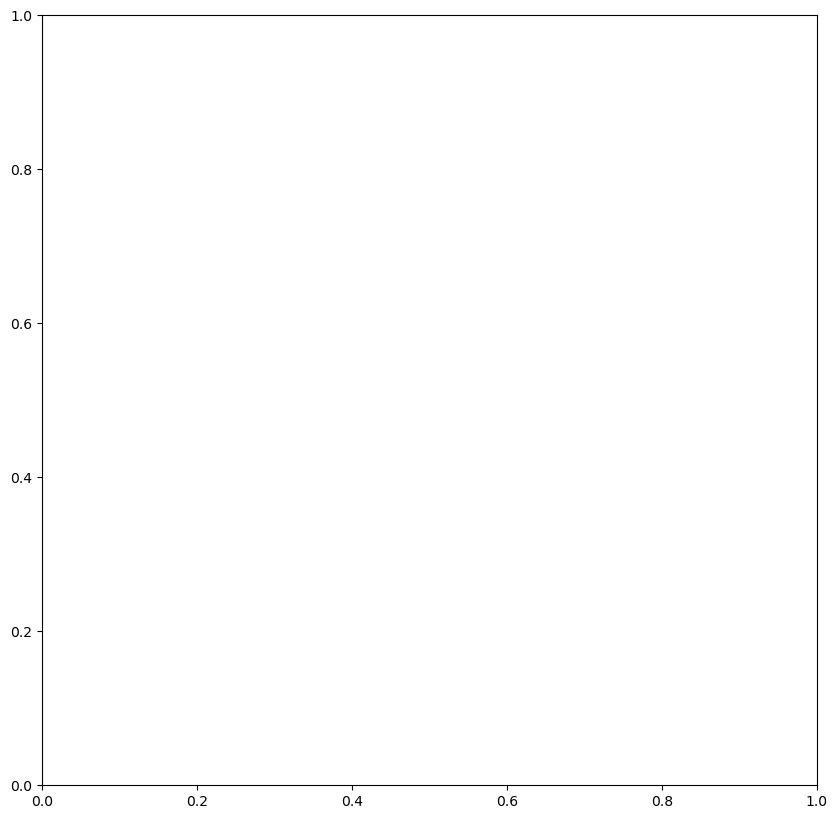

In [9]:
us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = us_map[us_map['name'].isin(['United States'])]
ax = us_states.boundary.plot(color='black', figsize=(10, 10))
ax.set_aspect('equal')
stbusloc_gdf.plot(ax=ax, column='State/Province', legend=True)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(color='black', figsize=(10, 10))
stbusloc_gdf.plot(ax=ax, column='State/Province', legend=True)

In [ ]:
plt_sb_ loc = ussbloc_df.hvplot.points(x='longitude', y='latitude', geo=True, tiles='OSM', hover_cols=['State/Province'])
plt_sb_loc

In [ ]:
plt_stb_loc = ussbloc_df.hvplot.points(
    geo = True,
    tiles = "OSM",
    hover_cols=['State/Province']
)

plt_stb_loc

In [ ]:
plt.figure(figsize=(12, 6))
ussbloc_df.plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
ussbloc_df.hvplot('longitude', 'latitude', geo=True, tiles='CartoLight', c='State/Province', hover_cols=['State/Province'])

In [ ]:
plt.figure(figsize=(10, 6))
plt.map(ussbloc_df['State/Province'], ussbloc_df['State/Province'],  c='blue', alpha=0.5)
plt.title('Starbucks Locations Worldwide')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()